In [2]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.svm import SVC

import numpy as np
import pandas as pd
import itertools
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import *
from lightgbm import LGBMClassifier

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
%matplotlib inline

In [3]:
def get_auc_scores(clf, X_train, X_test, y_train, y_test):
    '''Prints the AUC scores for training and testing data
    and returns testing score'''

    y_train_score = clf.predict_proba(X_train)[:, 1]
    y_test_score = clf.predict_proba(X_test)[:, 1]
    print('Training AUC:' , roc_auc_score(y_train, y_train_score))
    print('Testing AUC: ', roc_auc_score(y_test, y_test_score))
 
    return y_test_score

def plot_roc_curve(y_test, y_test_score):
    '''Plot ROC curve for testing data'''
    fpr, tpr, _ = roc_curve(y_test, y_test_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], 'k — ')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc='lower right')
    plt.show()

#https://medium.com/swlh/how-to-code-and-evaluate-of-decision-trees-2d94093b3c1a

In [4]:
## fix random seed
import random
random.seed(222)

# Data Preprocessing

In [5]:
path = pd.read_csv("../Data/cleansed_final.csv")

In [6]:
final = path[["MSI","Under50","TILS", "Stage12", "Signet", "RightSide","NoNecrosis", "Mucin", "ModDiff", "HistHet", "Female", "Expansile", "CrohnMissing", "Crohn", "AngioLymph"]]

In [7]:
final.corr()

,MSI,Under50,TILS,Stage12,Signet,RightSide,NoNecrosis,Mucin,ModDiff,HistHet,Female,Expansile,CrohnMissing,Crohn,AngioLymph
MSI,1.000000,0.016604,0.254277,0.054910,0.092552,0.193266,0.236852,0.191733,0.259828,0.092695,0.071438,0.110845,0.044430,0.071424,0.004327
Under50,0.016604,1.000000,-0.031544,-0.065956,0.031272,-0.033558,0.009924,-0.003553,0.000703,0.019226,0.071099,-0.105421,-0.014788,-0.002096,0.065491
TILS,0.254277,-0.031544,1.000000,0.145131,0.014077,0.139370,0.216396,0.201026,0.279354,0.117937,0.002330,0.211644,-0.004162,0.141986,-0.122893
Stage12,0.054910,-0.065956,0.145131,1.000000,-0.095906,0.029547,-0.011021,0.004360,-0.029065,-0.077724,-0.034166,0.245760,0.045722,0.097821,-0.262233
Signet,0.092552,0.031272,0.014077,-0.095906,1.000000,0.065117,0.237065,0.148202,0.230998,0.197953,0.026323,-0.030985,-0.001004,-0.005464,0.159666
RightSide,0.193266,-0.033558,0.139370,0.029547,0.065117,1.000000,0.125062,0.150758,0.170959,0.119610,0.081890,0.086323,0.033216,0.088632,0.008884
NoNecrosis,0.236852,0.009924,0.216396,-0.011021,0.237065,0.125062,1.000000,0.425246,0.494461,0.145757,0.045354,0.114346,0.021402,0.017174,0.036437
Mucin,0.191733,-0.003553,0.201026,0.004360,0.148202,0.150758,0.425246,1.000000,0.363871,0.241524,0.060469,0.155596,0.053415,0.007660,-0.031113
ModDiff,0.259828,0.000703,0.279354,-0.029065,0.230998,0.170959,0.494461,0.363871,1.000000,0.155940,0.023690,0.115039,0.070173,0.015696,0.044423
HistHet,0.092695,0.019226,0.117937,-0.077724,0.197953,0.119610,0.145757,0.241524,0.155940,1.000000,0.005980,-0.014575,-0.018499,0.046165,0.136273


In [8]:
y = final["MSI"]
X = final.loc[:, final.columns != 'MSI']

In [9]:
## train test val
## 81 : 9 : 10
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1)

# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=0.1, random_state=1)

In [10]:
X_test

,Under50,TILS,Stage12,Signet,RightSide,NoNecrosis,Mucin,ModDiff,HistHet,Female,Expansile,CrohnMissing,Crohn,AngioLymph
828,0,1,1,0,1,0,0,1,0,1,0,1,0,0
137,0,0,1,0,1,0,0,0,0,1,0,0,1,0
1420,0,0,0,0,0,0,0,1,0,0,0,0,0,0
267,0,0,1,0,0,0,1,1,1,0,0,0,0,1
186,0,0,0,0,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,0,1,1,0,0,0,0,0,0,0,0,0,1,1
1824,0,0,0,0,0,0,0,0,0,0,0,0,0,1
895,0,0,1,0,0,0,0,0,0,1,1,0,0,0
285,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [11]:
## use smote to deal with imbalanced data by oversampling
oversample = SMOTE(random_state = 1)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [12]:
forward_selected_feature_list = [ 'TILS',
 'ModDiff',
 'RightSide',
 'Female',
 'NoNecrosis',
 'Under50',
 'HistHet']

# Models

 ## 1. Regression Models

Training AUC: 0.7118979331353668
Testing AUC:  0.7553071364046974


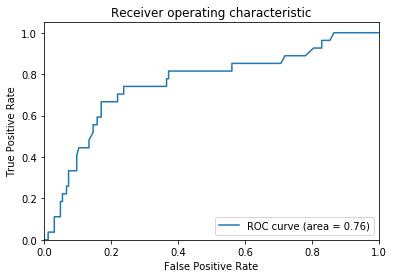

In [13]:
# Logistic regression
lr = LogisticRegression() 
lr.fit(X_smote, y_smote)
plot_roc_curve(y_test, get_auc_scores(lr, X_smote, X_test, y_smote, y_test))


In [14]:
#ridge regression
ridge_lr = LogisticRegression(penalty='l2',  solver='liblinear', C = 0.028)
ridge_lr.fit(X_smote, y_smote)

LogisticRegression(C=0.028, solver='liblinear')

Training AUC: 0.709402666993767
Testing AUC:  0.7758581752484192


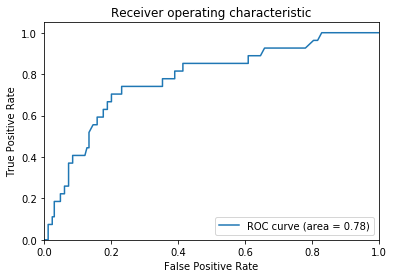

In [15]:
plot_roc_curve(y_test, get_auc_scores(ridge_lr, X_smote, X_test, y_smote, y_test))

In [16]:
#Lasso Regression
Lasso_lr = LogisticRegression(penalty='l1',  solver='liblinear', C = 1.02)
Lasso_lr.fit(X_smote, y_smote)

LogisticRegression(C=1.02, penalty='l1', solver='liblinear')

Training AUC: 0.7117308415764364
Testing AUC:  0.7583559168925023


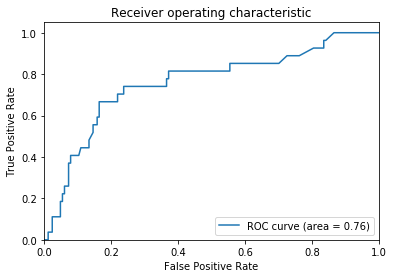

In [17]:
plot_roc_curve(y_test, get_auc_scores(Lasso_lr, X_smote, X_test, y_smote, y_test))

In [18]:
## Elastic net
elastic_net = SGDClassifier(loss='log', penalty='elasticnet', alpha = 0.41, l1_ratio = 0.09)
elastic_net.fit(X_smote, y_smote)

SGDClassifier(alpha=0.41, l1_ratio=0.09, loss='log', penalty='elasticnet')

Training AUC: 0.6964489663262217
Testing AUC:  0.7914408310749774


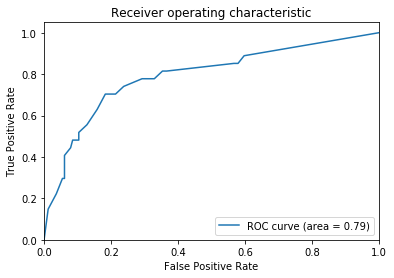

In [19]:
plot_roc_curve(y_test, get_auc_scores(elastic_net, X_smote, X_test, y_smote, y_test))

In [40]:
## decision tree
dt = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 2, min_samples_split = 5, min_samples_leaf = 6,  min_weight_fraction_leaf=0.0, max_features=1.0,  random_state=1, min_impurity_decrease=0.005,  min_impurity_split=None,   )
dt = dt.fit(X_smote, y_smote)

Training AUC: 0.6791298779507234
Testing AUC:  0.7378048780487805


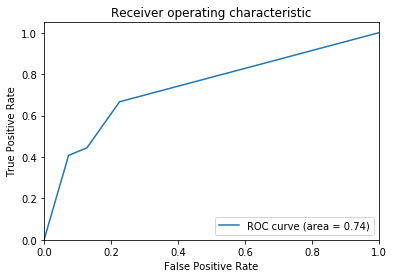

In [41]:
plot_roc_curve(y_test, get_auc_scores(dt, X_smote, X_test, y_smote, y_test))

In [22]:
## Random Fores8
rf = RandomForestClassifier(random_state = 1, max_depth =  3, min_samples_leaf = 3, min_samples_split = 3, n_estimators = 800)
rf = rf.fit(X_smote, y_smote)

Training AUC: 0.7362285889793941
Testing AUC:  0.7925700090334236


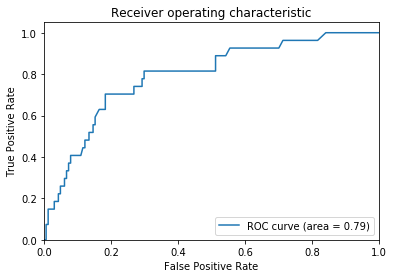

In [23]:
plot_roc_curve(y_test, get_auc_scores(rf, X_smote, X_test, y_smote, y_test))

In [24]:
## XGBoost
xgb_classifier = xgb.XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 10)

xgb_classifier = xgb_classifier.fit(X_smote, y_smote)

[11:10:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/jaeyoung/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training AUC: 0.7106961778047356
Testing AUC:  0.7733739837398373


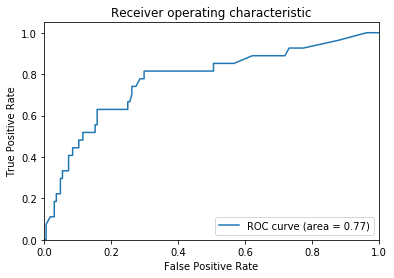

In [25]:
plot_roc_curve(y_test, get_auc_scores(xgb_classifier, X_smote, X_test, y_smote, y_test))

In [26]:
## LightGBM
lgb = LGBMClassifier(
    objective='binary',
    bagging_fraction=0.8, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=0.5, feature_fraction=0.4,
               importance_type='split', learning_rate=1e-06, max_depth=3,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=170, n_jobs=-1, num_leaves=50,
               random_state=1, reg_alpha=0.7, reg_lambda=0.005, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

lgb.fit(X_smote,y_smote)

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, colsample_bytree=0.5,
               feature_fraction=0.4, learning_rate=1e-06, max_depth=3,
               min_child_samples=6, min_split_gain=0.7, n_estimators=170,
               num_leaves=50, objective='binary', random_state=1, reg_alpha=0.7,
               reg_lambda=0.005)

Training AUC: 0.730351891925566
Testing AUC:  0.7904245709123757


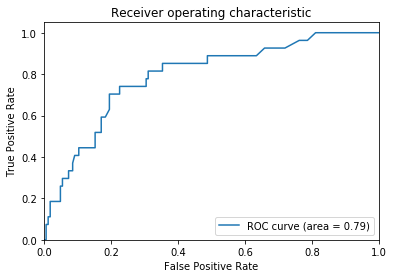

In [27]:
plot_roc_curve(y_test, get_auc_scores(lgb, X_smote, X_test, y_smote, y_test))

In [28]:
## Linear svm
ln_svm = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=258, shrinking=True, tol=0.001,
    verbose=False)
ln_svm = ln_svm.fit(X_smote, y_smote)

Training AUC: 0.7055933657890174
Testing AUC:  0.7735998193315266


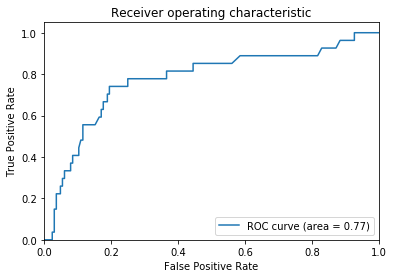

In [29]:
plot_roc_curve(y_test, get_auc_scores(ln_svm, X_smote, X_test, y_smote, y_test))

In [30]:
## SVM rbf
rbf_svm = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)
rbf_svm = rbf_svm.fit(X_smote, y_smote)

Training AUC: 0.7693948146563443
Testing AUC:  0.7548554652213189


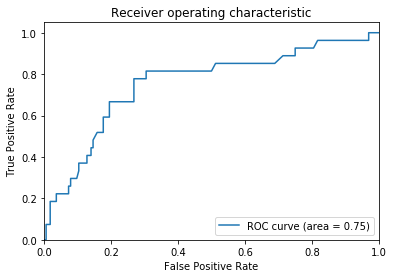

In [31]:
plot_roc_curve(y_test, get_auc_scores(rbf_svm, X_smote, X_test, y_smote, y_test))

In [42]:
## Bernoulli Naive Bayes Classifier
nb = BernoulliNB()
nb = nb.fit(X_smote, y_smote)

Training AUC: 0.6986223639012692
Testing AUC:  0.7889566395663956


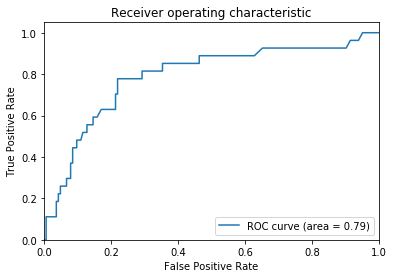

In [43]:
plot_roc_curve(y_test, get_auc_scores(nb, X_smote, X_test, y_smote, y_test))

In [44]:
## ANN
mlp = MLPClassifier(solver='adam', activation='relu', max_iter=200,alpha=1e-4,
                    hidden_layer_sizes=(15,15,2), random_state=1, verbose=True, early_stopping=True)

mlp.fit(X_smote, y_smote)

Iteration 1, loss = 0.69807911
Validation score: 0.534722
Iteration 2, loss = 0.68847027
Validation score: 0.527778
Iteration 3, loss = 0.68034355
Validation score: 0.562500
Iteration 4, loss = 0.67271493
Validation score: 0.600694
Iteration 5, loss = 0.66458237
Validation score: 0.625000
Iteration 6, loss = 0.65668027
Validation score: 0.642361
Iteration 7, loss = 0.64738106
Validation score: 0.628472
Iteration 8, loss = 0.63849456
Validation score: 0.649306
Iteration 9, loss = 0.62972307
Validation score: 0.652778
Iteration 10, loss = 0.62190357
Validation score: 0.656250
Iteration 11, loss = 0.61467162
Validation score: 0.663194
Iteration 12, loss = 0.60831609
Validation score: 0.659722
Iteration 13, loss = 0.60349340
Validation score: 0.666667
Iteration 14, loss = 0.60001270
Validation score: 0.666667
Iteration 15, loss = 0.59686577
Validation score: 0.677083
Iteration 16, loss = 0.59469937
Validation score: 0.680556
Iteration 17, loss = 0.59271605
Validation score: 0.680556
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(15, 15, 2),
              random_state=1, verbose=True)

Training AUC: 0.7486600077943866
Testing AUC:  0.752710027100271


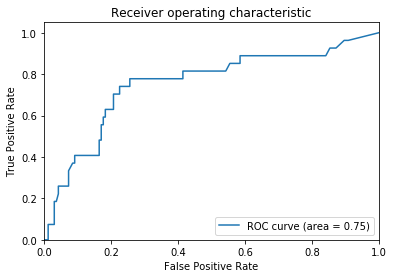

In [46]:
plot_roc_curve(y_test, get_auc_scores(mlp, X_smote, X_test, y_smote, y_test))

In [199]:
models = [lr,
ridge_lr,
Lasso_lr,
elastic_net,
dt,
rf,
xgb_classifier,
lgb,
ln_svm,
rbf_svm,
nb,
mlp]

model_name = ["Logistic Regression",
             "Ridge Regression",
             "Lasso Regression",
             "Elastic Net",
             "Decision Tree",
             "Random Forest",
             "XGBoost",
             "LightGBM",
             "Linear SVM",
             "RBF SVM",
             "Naive Bayes Classifier",
             "Neural Network"]

No handles with labels found to put in legend.


Training AUC: 0.7118979331353668
Testing AUC:  0.7553071364046974
Training AUC: 0.709402666993767
Testing AUC:  0.7758581752484192
Training AUC: 0.7117216660284026
Testing AUC:  0.7583559168925023
Training AUC: 0.6861506209672863
Testing AUC:  0.7769873532068655
Training AUC: 0.7083682446838566
Testing AUC:  0.6636178861788617
Training AUC: 0.7362285889793941
Testing AUC:  0.7925700090334236
Training AUC: 0.7106961778047356
Testing AUC:  0.7733739837398373
Training AUC: 0.730351891925566
Testing AUC:  0.7904245709123757
Training AUC: 0.7055933657890174
Testing AUC:  0.7735998193315266
Training AUC: 0.7693948146563443
Testing AUC:  0.7548554652213189
Training AUC: 0.6986223639012692
Testing AUC:  0.7889566395663956
Training AUC: 0.7486600077943866
Testing AUC:  0.752710027100271


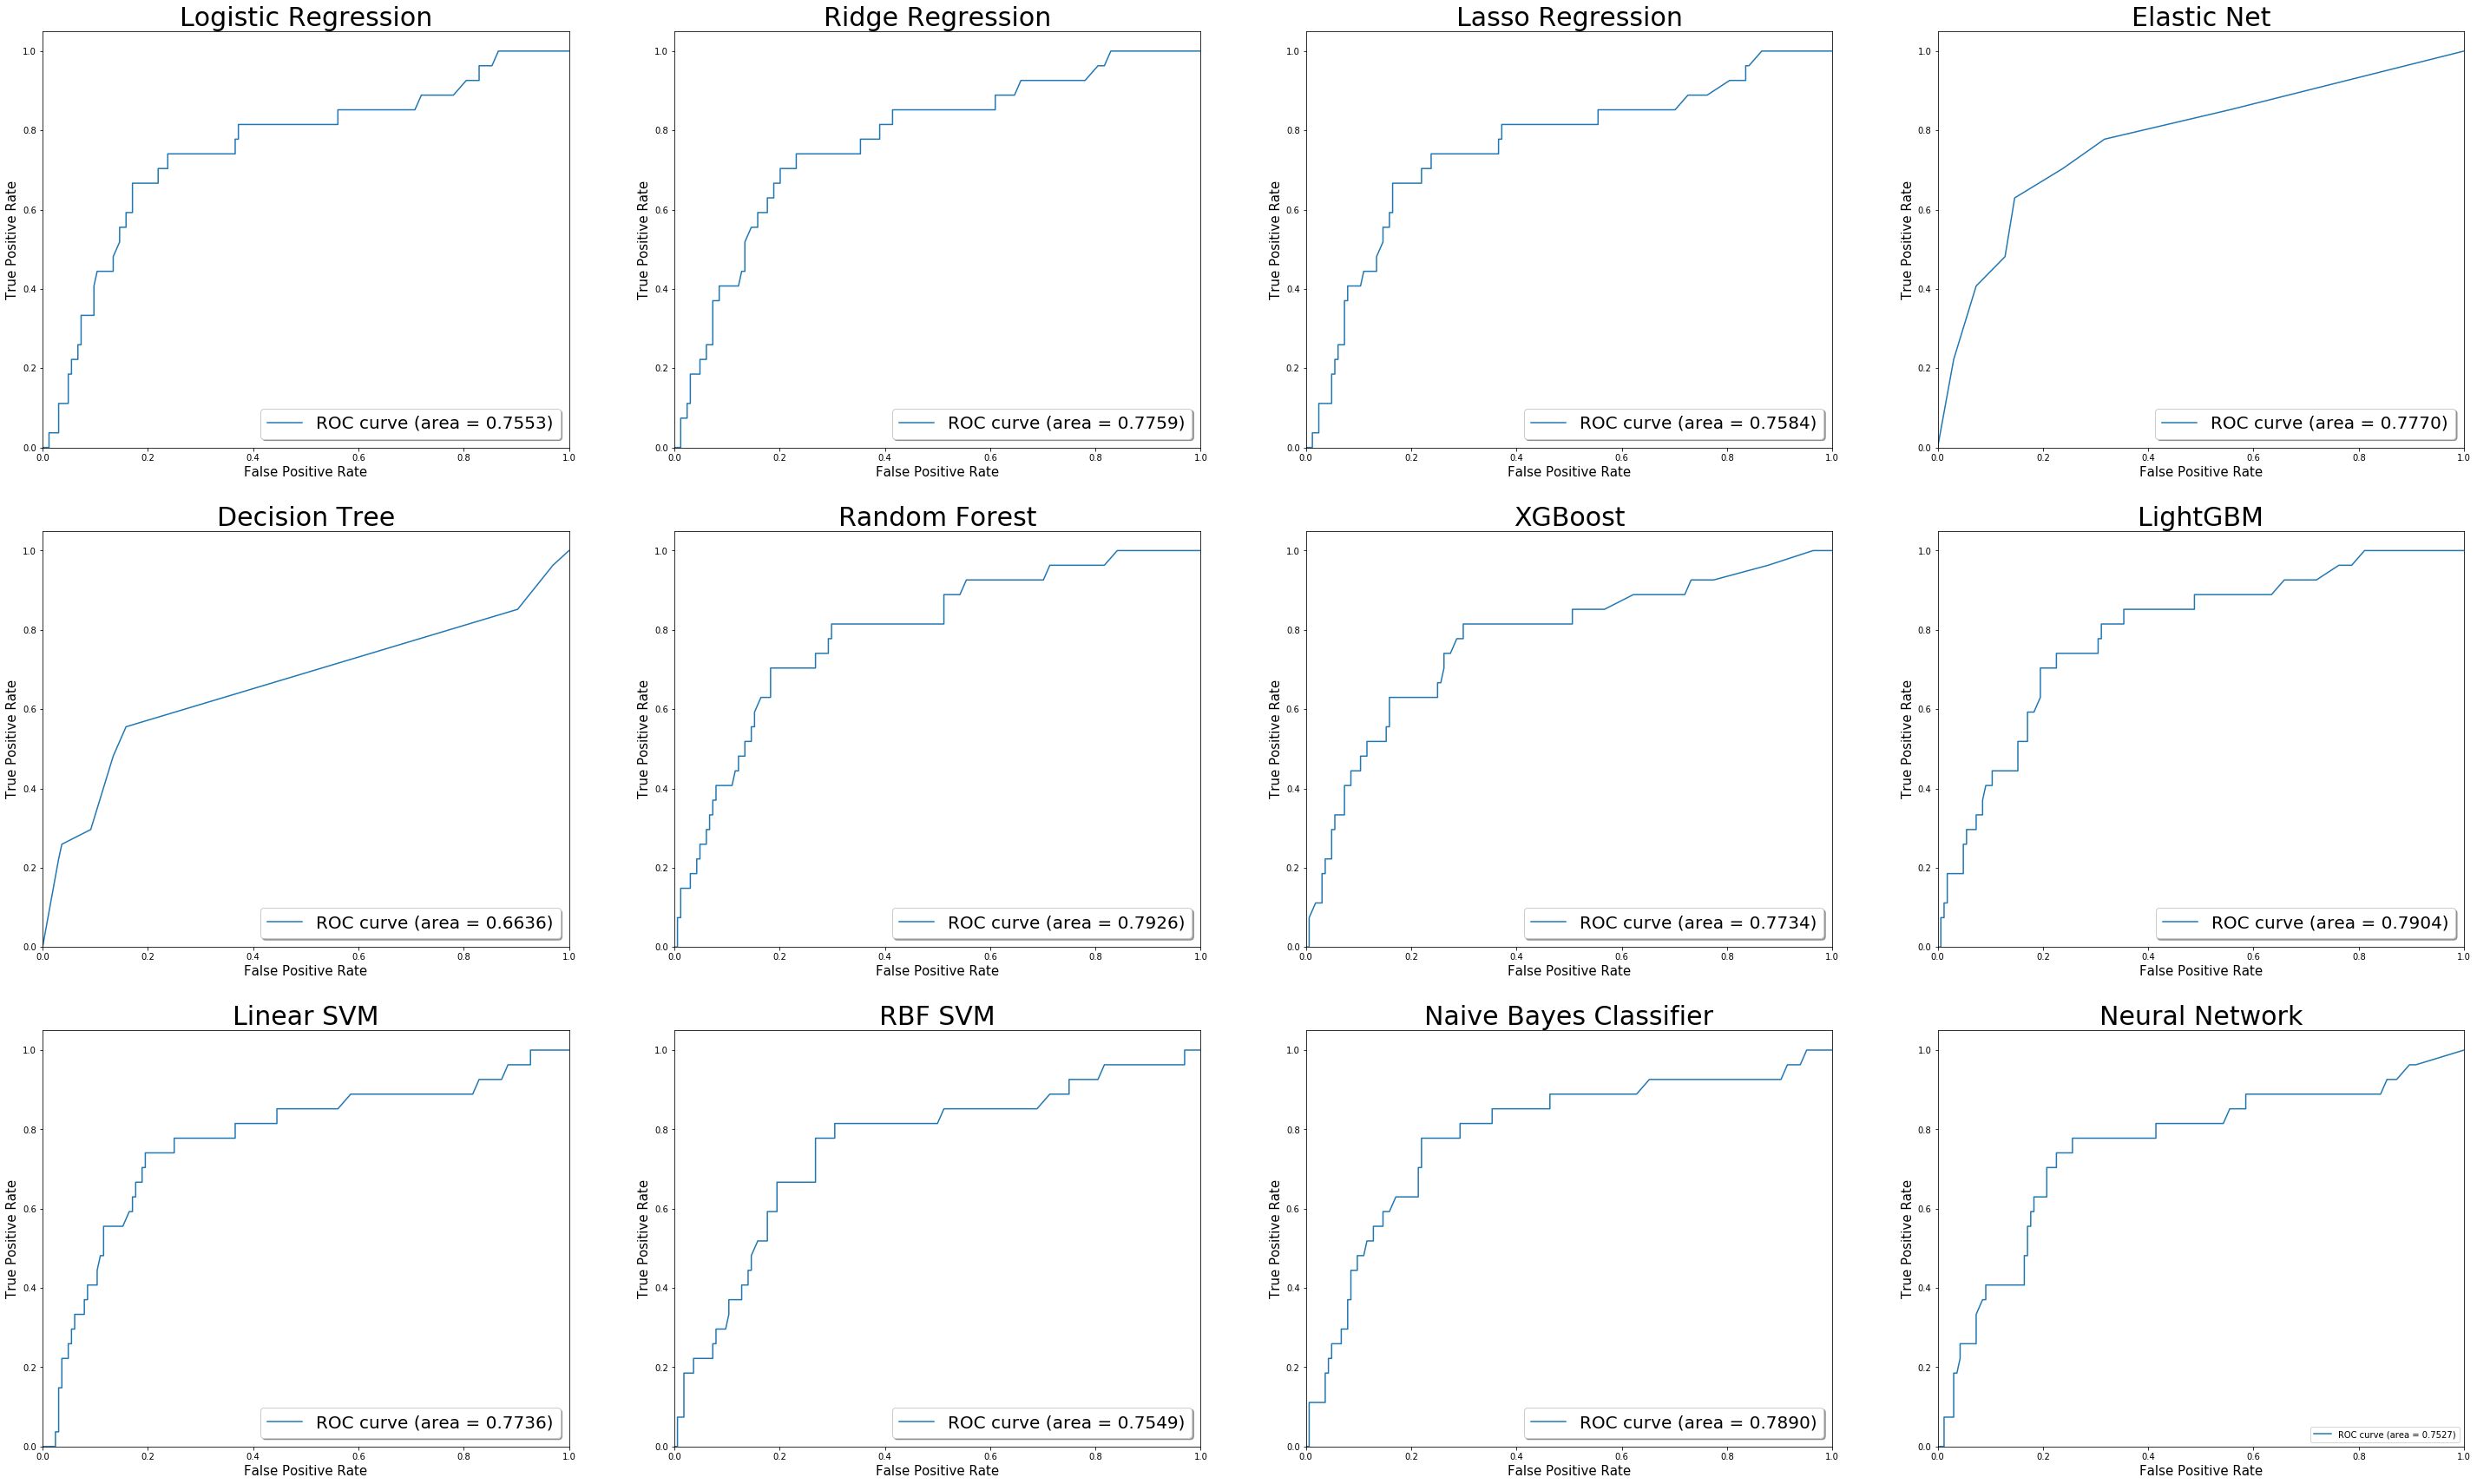

In [235]:
##Plot 12 models
plt.figure(figsize = (50,30))
for idx, (model, name) in enumerate(zip(models, model_name)):
    
    fpr, tpr, _ = roc_curve(y_test, get_auc_scores(model, X_smote, X_test, y_smote, y_test))
    roc_auc = auc(fpr, tpr)
    legend = plt.legend(loc='lower right', shadow=True, fontsize=20)
    legend.get_frame()
    plt.subplot(3,4,idx+1)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.title(name, fontsize = 30)
    plt.legend(loc='lower right')
    

